In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


## Wine dataset  

In [76]:
wine = load_wine()
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

타겟 데이터는 위 결과에서 class이며,
의미는 와인 종류 3가지(value = 0,1,2)


In [78]:
df = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target, dtype="category")
y

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Length: 178, dtype: category
Categories (3, int64): [0, 1, 2]

Series는 python에서 1차원 데이터를 다룰 때 쓰이며, 1차원 list와의 차이점은 index명을 부여할 수 있다는 점. 

In [79]:
y = sy.cat.rename_categories(wine.target_names)
y

0      class_0
1      class_0
2      class_0
3      class_0
4      class_0
        ...   
173    class_2
174    class_2
175    class_2
176    class_2
177    class_2
Length: 178, dtype: category
Categories (3, object): [class_0, class_1, class_2]

In [80]:
df['class'] = y
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0


In [81]:
df.shape

(178, 14)

In [205]:
labels =['class_0', 'class_1','class_2']
features=list(df.drop(['class'],axis=1).columns)
features

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

# 비교 

,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5,Principal Component 6,Principal Component 7,Principal Component 8,Principal Component 9,Principal Component 10,Principal Component 11,Principal Component 12,Principal Component 13,class
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,-0.451563,0.540810,-0.066239,class_0
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,-0.142657,0.388238,0.003637,class_0
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,-0.286673,0.000584,0.021717,class_0
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,0.759584,-0.242020,-0.369484,class_0
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,-0.525945,-0.216664,-0.079364,class_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1.058527,-0.574164,-1.108788,0.958416,-0.146097,-0.022498,-0.304117,0.139228,0.170786,-0.114427,class_2
174,-2.601956,-1.757229,0.207581,0.349496,0.255063,-0.026465,0.146894,-0.552427,-0.097969,-0.206061,0.258198,-0.279431,-0.187371,class_2
175,-2.677839,-2.760899,-0.940942,0.312035,1.271355,0.273068,0.679235,0.047024,0.001222,-0.247997,0.512492,0.698766,0.072078,class_2
176,-2.387017,-2.297347,-0.550696,-0.688285,0.813955,1.178783,0.633975,0.390829,0.057448,0.491490,0.299822,0.339821,-0.021866,class_2


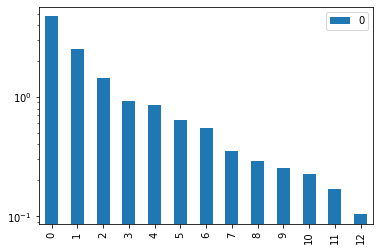

# The process of PCA
### 1) Scaling : transform scales to unit scale (m=0, v=1)

In [229]:
X = df.drop(['class'], axis=1).values
y=df['class'].values
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [230]:
X = StandardScaler().fit_transform(X)
X

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [252]:
df_scaled=pd.DataFrame(X, columns=features)

In [253]:
df_scaled['class']=y
df_scaled

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,class_0
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,class_0
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,class_0
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,class_0
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,class_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952,class_2
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893,class_2
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575,class_2
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498,class_2


### 2) Covariance matrix

In [106]:
X_cov = np.cov(X.T)

e_value, e_vector = np.linalg.eig(X_cov)

In [107]:
print('eigenvalue :', e_value) # eigen values
print('eigenvector :', e_vector) # eigen vectors

eigenvalue : [4.73243698 2.51108093 1.45424187 0.92416587 0.85804868 0.64528221
 0.55414147 0.10396199 0.35046627 0.16972374 0.29051203 0.22706428
 0.25232001]
eigenvector : [[-0.1443294   0.48365155  0.20738262 -0.0178563  -0.26566365  0.21353865
   0.05639636 -0.01496997  0.39613926 -0.26628645 -0.50861912 -0.22591696
   0.21160473]
 [ 0.24518758  0.22493093 -0.08901289  0.53689028  0.03521363  0.53681385
  -0.42052391 -0.02596375  0.06582674  0.12169604  0.07528304  0.07648554
  -0.30907994]
 [ 0.00205106  0.31606881 -0.6262239  -0.21417556 -0.14302547  0.15447466
   0.14917061  0.14121803 -0.17026002 -0.04962237  0.30769445 -0.49869142
  -0.02712539]
 [ 0.23932041 -0.0105905  -0.61208035  0.06085941  0.06610294 -0.10082451
   0.28696914 -0.09168285  0.42797018 -0.05574287 -0.20044931  0.47931378
   0.05279942]
 [-0.14199204  0.299634   -0.13075693 -0.35179658  0.72704851  0.03814394
  -0.3228833  -0.05677422 -0.15636143  0.06222011 -0.27140257  0.07128891
   0.06787022]
 [-0.394660

표준화 과정으로 모든 변수의 분산은 1로 맞춰져 있다. \
분산이 클수록 정보양이 많다고(설명력이 높음) 했을때, 주성분은 각 변수의 설명력보다는 적어도 높아야 한다. \
왜냐하면 주성분 공식을 생각했을 때, 각 변수의 선형결합으로 이루어져있기 때문에.

그래서 주성분의 분산값인 고유값이 1보다 큰 경우만 선별하고자 한다. \
여기서는 제3주성분까지!

구글링한 자료에서 각 주성분 요인의 분산과 누적 분산값 그래프 그리기

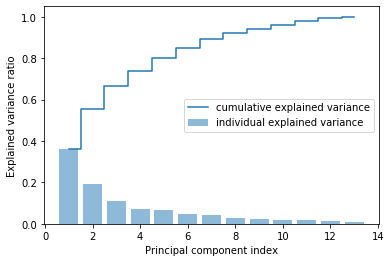

In [165]:
tot = sum(e_value);
var_exp = [(i / tot) for i in sorted(e_value, reverse=True)];
cum_var_exp = np.cumsum(var_exp);
plt.bar(range(1,14), var_exp, alpha=0.5, align='center',label='individual explained variance')
plt.step(range(1,14), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

## 3) PCA

In [281]:
pca1 = PCA(n_components=3)
X_pca1 = pca1.fit_transform(df_scaled[features])

df_pca1 = pd.DataFrame(data=X_pca1, 
                      columns=['Principal Component '+str(i) for i in range(1,4)])

df_pca1=pd.concat([df_pca1, df_scaled[['class']]],axis=1) # target 변수 'class'와 합치기
df_pca1

,Principal Component 1,Principal Component 2,Principal Component 3,class
0,3.316751,-1.443463,-0.165739,class_0
1,2.209465,0.333393,-2.026457,class_0
2,2.516740,-1.031151,0.982819,class_0
3,3.757066,-2.756372,-0.176192,class_0
4,1.008908,-0.869831,2.026688,class_0
...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,class_2
174,-2.601956,-1.757229,0.207581,class_2
175,-2.677839,-2.760899,-0.940942,class_2
176,-2.387017,-2.297347,-0.550696,class_2


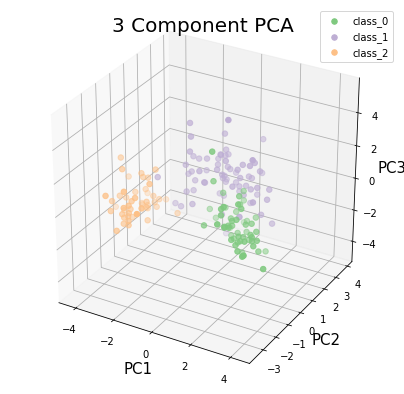

In [282]:
from mpl_toolkits.mplot3d import Axes3D

fig2 = plt.figure(figsize=(7,7))
ax2 = fig2.add_subplot(111, projection='3d')

ax2.set_xlabel('PC1', fontsize = 15)
ax2.set_ylabel('PC2', fontsize = 15)
ax2.set_zlabel('PC3', fontsize = 15)
ax2.set_title('3 Component PCA', fontsize = 20)

colors = ["#7fc97f","#beaed4","#fdc086"]
for label, color in zip(labels, colors):
  indicesToKeep = df_pca1['class'] == label
  ax2.scatter(df_pca1.loc[indicesToKeep, 'Principal Component 1']
               , df_pca1.loc[indicesToKeep, 'Principal Component 2']
               , df_pca1.loc[indicesToKeep, 'Principal Component 3']
               , c = color
               , s = 30)

ax2.legend(labels)
ax2.grid()

추가적으로 제2주성분까지, 올려주신 코드대로 해보면 아래와 같다.

In [285]:
pca2 = PCA(n_components=2)
X_pca2 = pca2.fit_transform(df_scaled[features])

df_pca2 = pd.DataFrame(data=X_pca2, 
                      columns=['Principal Component '+str(i) for i in range(1,3)])

df_pca2=pd.concat([df_pca2, df_scaled[['class']]],axis=1) # target 변수 'class'와 합치기
df_pca2

,Principal Component 1,Principal Component 2,class
0,3.316751,-1.443463,class_0
1,2.209465,0.333393,class_0
2,2.516740,-1.031151,class_0
3,3.757066,-2.756372,class_0
4,1.008908,-0.869831,class_0
...,...,...,...
173,-3.370524,-2.216289,class_2
174,-2.601956,-1.757229,class_2
175,-2.677839,-2.760899,class_2
176,-2.387017,-2.297347,class_2


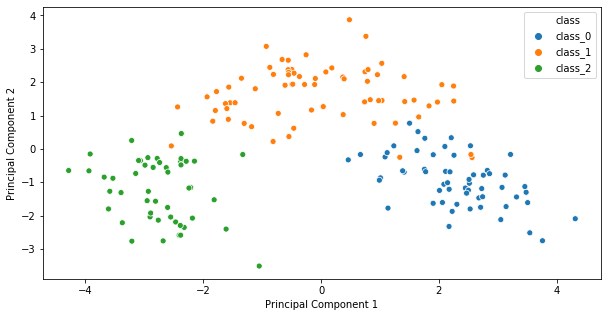

In [286]:
# PCA 결과를 시각화를 통해 확인합니다.
plt.figure(figsize=(10, 5))
sns.scatterplot(x = df_pca2['Principal Component 1'], y = df_pca1['Principal Component 2'], hue = df_pca1['class'])

전체 주성분의 설명력?비율이 어느 정도인지 확인 

In [288]:
pca0 = PCA()
X_pca0 = pca0.fit_transform(df_scaled[features])
X_pca0

df_pca0 = pd.DataFrame(data=X_pca0,
                      columns=['Principal Component '+str(i) for i in range(1,14)])
df_pca0=pd.concat([df_pca0, df[['class']]],axis=1) # target 변수 'class'와 합치기
df_pca0

,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5,Principal Component 6,Principal Component 7,Principal Component 8,Principal Component 9,Principal Component 10,Principal Component 11,Principal Component 12,Principal Component 13,class
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,-0.451563,0.540810,-0.066239,class_0
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,-0.142657,0.388238,0.003637,class_0
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,-0.286673,0.000584,0.021717,class_0
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,0.759584,-0.242020,-0.369484,class_0
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,-0.525945,-0.216664,-0.079364,class_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1.058527,-0.574164,-1.108788,0.958416,-0.146097,-0.022498,-0.304117,0.139228,0.170786,-0.114427,class_2
174,-2.601956,-1.757229,0.207581,0.349496,0.255063,-0.026465,0.146894,-0.552427,-0.097969,-0.206061,0.258198,-0.279431,-0.187371,class_2
175,-2.677839,-2.760899,-0.940942,0.312035,1.271355,0.273068,0.679235,0.047024,0.001222,-0.247997,0.512492,0.698766,0.072078,class_2
176,-2.387017,-2.297347,-0.550696,-0.688285,0.813955,1.178783,0.633975,0.390829,0.057448,0.491490,0.299822,0.339821,-0.021866,class_2


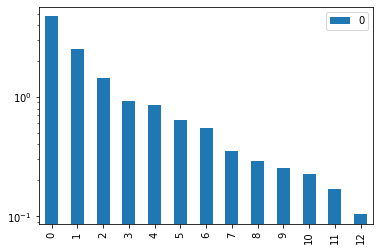

In [289]:
PC_ratio=pca0.explained_variance_
PC_ratio_df=pd.DataFrame(PC_ratio)
PC_ratio_df.plot(kind='bar',logy=True)

# PCA 적용 전과 후 비교

In [290]:
X_train, X_test, y_train, y_test = train_test_split(df_scaled[features],df_scaled['class'],
                                                    test_size = 0.4, random_state=0)

In [291]:
pca = PCA(n_components=3)
pca.fit(X_train)
train_score = pca.transform(X_train)
test_score = pca.transform(X_test)

In [292]:
clf = LogisticRegression(max_iter=2000, random_state=0,
                        multi_class='multinomial', 
                        solver='sag')

clf2 = LogisticRegression(max_iter=2000, random_state=0,
                        multi_class='multinomial', 
                        solver='sag')

In [293]:
# Raw Data
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
cf1 = confusion_matrix(y_test, pred)
print(cf1)
print(accuracy_score(y_test, pred))

[[22  0  0]
 [ 0 29  2]
 [ 0  0 19]]
0.9722222222222222


In [294]:
# PC scores
clf2.fit(train_score, y_train)
pred2 = clf2.predict(test_score)
cf2 = confusion_matrix(y_test, pred2)
print(cf2)
print(accuracy_score(y_test, pred2))

[[22  0  0]
 [ 1 29  1]
 [ 0  0 19]]
0.9722222222222222


PCA 적용 전후 예측력이 완전 같게 나옴.

????????????